In [184]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Dense, GRU, Conv1D, MaxPooling1D, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# GENERAL TWEETS DATA

In [186]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/APPL/GENERAL_FINBERT_AAPL_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,29.037500,0.026383,0.067666,0.905950,28.950001,29.082500,28.690001,115127600
2017-01-04,29.004999,0.084946,0.010520,0.904534,28.962500,29.127501,28.937500,84472400
2017-01-05,29.152500,0.243323,0.009641,0.747037,28.980000,29.215000,28.952499,88774400
2017-01-06,29.477501,0.088136,0.279558,0.632305,29.195000,29.540001,29.117500,127007600
2017-01-09,29.747499,0.088136,0.279558,0.632305,29.487499,29.857500,29.485001,134247600
...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,0.300657,0.145550,0.553793,156.710007,158.229996,153.270004,123055300
2022-05-03,159.479996,0.300657,0.145550,0.553793,158.149994,160.710007,156.320007,88966500
2022-05-04,166.020004,0.300657,0.145550,0.553793,159.669998,166.479996,159.259995,108256500


In [187]:
stock_data.shape

(1346, 8)

In [188]:
stock_data.isna().sum()

Close        0
negative    22
neutral     22
positive    22
Open         0
High         0
Low          0
Volume       0
dtype: int64

In [189]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,29.037500,0.026383,0.067666,0.905950,28.950001,29.082500,28.690001,115127600
2017-01-04,29.004999,0.084946,0.010520,0.904534,28.962500,29.127501,28.937500,84472400
2017-01-05,29.152500,0.243323,0.009641,0.747037,28.980000,29.215000,28.952499,88774400
2017-01-06,29.477501,0.088136,0.279558,0.632305,29.195000,29.540001,29.117500,127007600
2017-01-09,29.747499,0.088136,0.279558,0.632305,29.487499,29.857500,29.485001,134247600
...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,0.300657,0.145550,0.553793,156.710007,158.229996,153.270004,123055300
2022-05-03,159.479996,0.300657,0.145550,0.553793,158.149994,160.710007,156.320007,88966500
2022-05-04,166.020004,0.300657,0.145550,0.553793,159.669998,166.479996,159.259995,108256500


In [190]:
stock_data.isna().sum()

Close       0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [191]:
stock_data = stock_data.dropna()

In [192]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,29.037500,0.026383,0.067666,0.905950,28.950001,29.082500,28.690001,115127600
2017-01-04,29.004999,0.084946,0.010520,0.904534,28.962500,29.127501,28.937500,84472400
2017-01-05,29.152500,0.243323,0.009641,0.747037,28.980000,29.215000,28.952499,88774400
2017-01-06,29.477501,0.088136,0.279558,0.632305,29.195000,29.540001,29.117500,127007600
2017-01-09,29.747499,0.088136,0.279558,0.632305,29.487499,29.857500,29.485001,134247600
...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,0.300657,0.145550,0.553793,156.710007,158.229996,153.270004,123055300
2022-05-03,159.479996,0.300657,0.145550,0.553793,158.149994,160.710007,156.320007,88966500
2022-05-04,166.020004,0.300657,0.145550,0.553793,159.669998,166.479996,159.259995,108256500


In [193]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03
mean,80.715087,0.244875,0.133937,0.621188,80.657097,81.564083,79.786549,1.192435e+08
std,45.486364,0.141821,0.116151,0.161594,45.473166,46.053070,44.881743,5.497285e+07
min,29.004999,0.011168,0.008388,0.025368,28.950001,29.082500,28.690001,4.100000e+07
25%,43.315625,0.130093,0.056331,0.517397,43.363126,43.730000,43.008751,8.346862e+07
50%,55.773750,0.252171,0.114219,0.614602,55.707500,56.225000,55.004999,1.045826e+08
75%,124.347502,0.323821,0.162268,0.724373,124.005003,125.322498,122.250000,1.379745e+08
max,182.009995,0.948033,0.962168,0.951673,182.630005,182.940002,179.119995,4.479400e+08


In [194]:
stock_data= stock_data.astype({"Volume":'float'})

In [195]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 2017-01-03 to 2022-05-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1346 non-null   float64
 1   negative  1346 non-null   float64
 2   neutral   1346 non-null   float64
 3   positive  1346 non-null   float64
 4   Open      1346 non-null   float64
 5   High      1346 non-null   float64
 6   Low       1346 non-null   float64
 7   Volume    1346 non-null   float64
dtypes: float64(8)
memory usage: 94.6+ KB


In [196]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1076
Number of records in Test Data: 270


In [197]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [198]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-01-04     29.004999
2017-01-05     29.152500
2017-01-06     29.477501
2017-01-09     29.747499
2017-01-10     29.777500
                 ...    
2022-05-02    157.960007
2022-05-03    159.479996
2022-05-04    166.020004
2022-05-05    156.770004
2022-05-06    157.279999
Name: Close, Length: 1345, dtype: float64

In [199]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,29.004999,29.021250,29.029375,29.033167,29.035404,29.152500,0.904534,0.905242,0.905596,0.905761,...,0.030162,0.010520,0.039093,0.053380,0.060047,0.063979,84472400.0,28.962500,29.127501,28.937500
2017-01-05,29.152500,29.086875,29.060156,29.049078,29.042958,29.477501,0.747037,0.826139,0.865956,0.884598,...,0.043914,0.009641,0.024367,0.042445,0.053326,0.060474,88774400.0,28.980000,29.215000,28.952499
2017-01-06,29.477501,29.282188,29.164492,29.106201,29.070993,29.747499,0.632305,0.729222,0.807544,0.850959,...,0.046767,0.279558,0.151963,0.101723,0.083490,0.074608,127007600.0,29.195000,29.540001,29.117500
2017-01-09,29.747499,29.514844,29.310244,29.191708,29.114639,29.777500,0.632305,0.680764,0.763734,0.821805,...,0.049436,0.279558,0.215761,0.146182,0.109633,0.087831,134247600.0,29.487499,29.857500,29.485001
2017-01-10,29.777500,29.646172,29.427058,29.269813,29.157404,29.937500,0.632305,0.656535,0.730877,0.796539,...,0.051933,0.279558,0.247660,0.179526,0.132289,0.100200,97848400.0,29.692499,29.844999,29.575001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,158.644570,160.183769,162.694748,165.187801,159.479996,0.553793,0.553772,0.551981,0.544904,...,0.313817,0.145550,0.145556,0.146058,0.148049,0.152592,123055300.0,156.710007,158.229996,153.270004
2022-05-03,159.479996,159.062283,160.007826,162.266114,164.819556,166.020004,0.553793,0.553783,0.552434,0.546090,...,0.312968,0.145550,0.145553,0.145931,0.147716,0.152137,88966500.0,158.149994,160.710007,156.320007
2022-05-04,166.020004,162.541143,161.510870,162.766633,164.897004,156.770004,0.553793,0.553788,0.552774,0.547117,...,0.312174,0.145550,0.145551,0.145836,0.147427,0.151712,108256500.0,159.669998,166.479996,159.259995


In [200]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,29.004999,29.021250,29.029375,29.033167,29.035404,29.152500,0.904534,0.905242,0.905596,0.905761,...,0.030162,0.010520,0.039093,0.053380,0.060047,0.063979,84472400.0,28.962500,29.127501,28.937500
2017-01-05,29.152500,29.086875,29.060156,29.049078,29.042958,29.477501,0.747037,0.826139,0.865956,0.884598,...,0.043914,0.009641,0.024367,0.042445,0.053326,0.060474,88774400.0,28.980000,29.215000,28.952499
2017-01-06,29.477501,29.282188,29.164492,29.106201,29.070993,29.747499,0.632305,0.729222,0.807544,0.850959,...,0.046767,0.279558,0.151963,0.101723,0.083490,0.074608,127007600.0,29.195000,29.540001,29.117500
2017-01-09,29.747499,29.514844,29.310244,29.191708,29.114639,29.777500,0.632305,0.680764,0.763734,0.821805,...,0.049436,0.279558,0.215761,0.146182,0.109633,0.087831,134247600.0,29.487499,29.857500,29.485001
2017-01-10,29.777500,29.646172,29.427058,29.269813,29.157404,29.937500,0.632305,0.656535,0.730877,0.796539,...,0.051933,0.279558,0.247660,0.179526,0.132289,0.100200,97848400.0,29.692499,29.844999,29.575001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,157.649994,159.329132,160.925023,163.423169,165.686270,157.960007,0.553793,0.553751,0.551376,0.543537,...,0.314724,0.145550,0.145562,0.146228,0.148433,0.153077,131747600.0,161.839996,166.199997,157.250000
2022-05-02,157.960007,158.644570,160.183769,162.694748,165.187801,159.479996,0.553793,0.553772,0.551981,0.544904,...,0.313817,0.145550,0.145556,0.146058,0.148049,0.152592,123055300.0,156.710007,158.229996,153.270004
2022-05-03,159.479996,159.062283,160.007826,162.266114,164.819556,166.020004,0.553793,0.553783,0.552434,0.546090,...,0.312968,0.145550,0.145553,0.145931,0.147716,0.152137,88966500.0,158.149994,160.710007,156.320007


In [201]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-01-04     29.152500
2017-01-05     29.477501
2017-01-06     29.747499
2017-01-09     29.777500
2017-01-10     29.937500
                 ...    
2022-04-29    157.960007
2022-05-02    159.479996
2022-05-03    166.020004
2022-05-04    156.770004
2022-05-05    157.279999
Name: close_price_shifted, Length: 1344, dtype: float64

In [202]:
y[:1085]

Date
2017-01-04     29.152500
2017-01-05     29.477501
2017-01-06     29.747499
2017-01-09     29.777500
2017-01-10     29.937500
                 ...    
2021-04-21    131.940002
2021-04-22    134.320007
2021-04-23    134.720001
2021-04-26    134.389999
2021-04-27    133.580002
Name: close_price_shifted, Length: 1085, dtype: float64

In [203]:
y[1085:]

Date
2021-04-28    133.479996
2021-04-29    131.460007
2021-04-30    132.539993
2021-05-03    127.849998
2021-05-04    128.100006
                 ...    
2022-04-29    157.960007
2022-05-02    159.479996
2022-05-03    166.020004
2022-05-04    156.770004
2022-05-05    157.279999
Name: close_price_shifted, Length: 259, dtype: float64

In [204]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,29.004999,29.021250,29.029375,29.033167,29.035404,29.152500,0.904534,0.905242,0.905596,0.905761,...,0.030162,0.010520,0.039093,0.053380,0.060047,0.063979,84472400.0,28.962500,29.127501,28.937500
2017-01-05,29.152500,29.086875,29.060156,29.049078,29.042958,29.477501,0.747037,0.826139,0.865956,0.884598,...,0.043914,0.009641,0.024367,0.042445,0.053326,0.060474,88774400.0,28.980000,29.215000,28.952499
2017-01-06,29.477501,29.282188,29.164492,29.106201,29.070993,29.747499,0.632305,0.729222,0.807544,0.850959,...,0.046767,0.279558,0.151963,0.101723,0.083490,0.074608,127007600.0,29.195000,29.540001,29.117500
2017-01-09,29.747499,29.514844,29.310244,29.191708,29.114639,29.777500,0.632305,0.680764,0.763734,0.821805,...,0.049436,0.279558,0.215761,0.146182,0.109633,0.087831,134247600.0,29.487499,29.857500,29.485001
2017-01-10,29.777500,29.646172,29.427058,29.269813,29.157404,29.937500,0.632305,0.656535,0.730877,0.796539,...,0.051933,0.279558,0.247660,0.179526,0.132289,0.100200,97848400.0,29.692499,29.844999,29.575001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,157.649994,159.329132,160.925023,163.423169,165.686270,157.960007,0.553793,0.553751,0.551376,0.543537,...,0.314724,0.145550,0.145562,0.146228,0.148433,0.153077,131747600.0,161.839996,166.199997,157.250000
2022-05-02,157.960007,158.644570,160.183769,162.694748,165.187801,159.479996,0.553793,0.553772,0.551981,0.544904,...,0.313817,0.145550,0.145556,0.146058,0.148049,0.152592,123055300.0,156.710007,158.229996,153.270004
2022-05-03,159.479996,159.062283,160.007826,162.266114,164.819556,166.020004,0.553793,0.553783,0.552434,0.546090,...,0.312968,0.145550,0.145553,0.145931,0.147716,0.152137,88966500.0,158.149994,160.710007,156.320007


In [205]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = preprocessing.StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = preprocessing.StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 29.00499916,  29.02124977,  29.02937508, ...,  28.96249962,
          29.12750053,  28.9375    ],
        [ 29.15250015,  29.08687496,  29.06015635, ...,  28.97999954,
          29.21500015,  28.95249939],
        [ 29.47750092,  29.28218794,  29.16449249, ...,  29.19499969,
          29.54000092,  29.11750031],
        ...,
        [159.47999573, 159.06228262, 160.0078257 , ..., 158.1499939 ,
         160.71000671, 156.32000732],
        [166.02000427, 162.54114345, 161.51087034, ..., 159.66999817,
         166.47999573, 159.25999451],
        [156.77000427, 159.65557386, 160.32565382, ..., 163.8500061 ,
         164.08000183, 154.94999695]]), array([[ 29.15250015],
        [ 29.47750092],
        [ 29.74749947],
        ...,
        [166.02000427],
        [156.77000427],
        [157.27999878]]))

In [206]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1076, 25) and y: (1076, 1)
Number of rows and columns in the Test set X: (267, 25) and y: (267, 1)


In [207]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [208]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1076, 25, 1)
Shape of Test set X: (267, 25, 1)


# MODEL FOR GENERAL TWEETS

In [209]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf
import random 
import os
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model1=Sequential()
model1.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model1.add(Dropout(0.4))
model1.add((GRU(200,return_sequences=True,activation='tanh')))
model1.add(Dropout(0.4))
model1.add((GRU(150,activation='tanh', return_sequences=True)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(1, activation = 'linear'))

# printing the model summary
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_18 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_19 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_19 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_20 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_20 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_6 (Flatten)         (None, 3750)             

In [210]:
import tensorflow as tf
model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
61/61 [==============================] - 15s 159ms/step - loss: 0.2409 - val_loss: 0.2391
Epoch 2/100
61/61 [==============================] - 9s 145ms/step - loss: 0.0477 - val_loss: 0.0158
Epoch 3/100
61/61 [==============================] - 9s 142ms/step - loss: 0.0157 - val_loss: 0.0200
Epoch 4/100
61/61 [==============================] - 9s 141ms/step - loss: 0.0168 - val_loss: 0.0120
Epoch 5/100
61/61 [==============================] - 9s 144ms/step - loss: 0.0141 - val_loss: 0.0164
Epoch 6/100
61/61 [==============================] - 9s 147ms/step - loss: 0.0127 - val_loss: 0.0117
Epoch 7/100
61/61 [==============================] - 9s 141ms/step - loss: 0.0140 - val_loss: 0.0203
Epoch 8/100
61/61 [==============================] - 9s 141ms/step - loss: 0.0132 - val_loss: 0.0173
Epoch 9/100
61/61 [==============================] - 9s 140ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 10/100
61/61 [==============================] - 9s 145ms/step - loss: 0.0115 - val_l

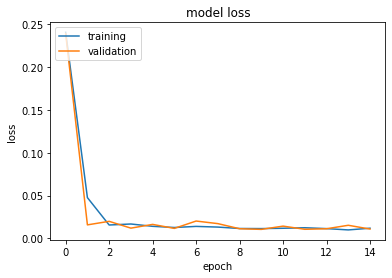

In [211]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [212]:
# performing predictions
predictions1 = model1.predict(X_test) 

# unscaling the predictions
predictions1 = scaler_y.inverse_transform(np.array(predictions1).reshape((len(predictions1), 1)))

# printing the predictions
print('Predictions:')
predictions1

Predictions:


array([[132.28697 ],
       [132.39197 ],
       [131.82074 ],
       [131.24968 ],
       [131.09222 ],
       [131.61285 ],
       [130.85414 ],
       [131.09831 ],
       [131.5164  ],
       [131.90826 ],
       [130.97446 ],
       [130.73837 ],
       [130.02687 ],
       [129.37042 ],
       [129.65549 ],
       [129.5595  ],
       [129.09444 ],
       [128.14195 ],
       [126.97594 ],
       [126.79249 ],
       [127.08487 ],
       [125.90853 ],
       [125.34463 ],
       [125.6457  ],
       [126.09436 ],
       [122.68115 ],
       [127.422424],
       [127.29061 ],
       [125.62521 ],
       [125.51628 ],
       [124.91261 ],
       [125.85109 ],
       [125.05468 ],
       [125.27226 ],
       [124.749466],
       [125.3237  ],
       [126.02661 ],
       [123.36984 ],
       [127.28801 ],
       [127.17954 ],
       [128.92755 ],
       [128.64424 ],
       [129.01514 ],
       [129.45517 ],
       [128.84335 ],
       [129.7201  ],
       [130.27325 ],
       [130.4

# EXECUTIVE TWEETS DATA

In [213]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/APPL/EXEC_FINBERT_AAPL_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,29.037500,0.028641,0.039159,0.932201,28.950001,29.082500,28.690001,115127600
2017-01-04,29.004999,NaN,NaN,NaN,28.962500,29.127501,28.937500,84472400
2017-01-05,29.152500,NaN,NaN,NaN,28.980000,29.215000,28.952499,88774400
2017-01-06,29.477501,NaN,NaN,NaN,29.195000,29.540001,29.117500,127007600
2017-01-09,29.747499,NaN,NaN,NaN,29.487499,29.857500,29.485001,134247600
...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,NaN,NaN,NaN,156.710007,158.229996,153.270004,123055300
2022-05-03,159.479996,NaN,NaN,NaN,158.149994,160.710007,156.320007,88966500
2022-05-04,166.020004,NaN,NaN,NaN,159.669998,166.479996,159.259995,108256500


In [214]:
stock_data.shape

(1346, 8)

In [215]:
stock_data.isna().sum()

Close          0
negative    1167
neutral     1167
positive    1167
Open           0
High           0
Low            0
Volume         0
dtype: int64

In [216]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,29.037500,0.028641,0.039159,0.932201,28.950001,29.082500,28.690001,115127600
2017-01-04,29.004999,0.033496,0.037370,0.929134,28.962500,29.127501,28.937500,84472400
2017-01-05,29.152500,0.038352,0.035581,0.926068,28.980000,29.215000,28.952499,88774400
2017-01-06,29.477501,0.043207,0.033791,0.923001,29.195000,29.540001,29.117500,127007600
2017-01-09,29.747499,0.048062,0.032002,0.919935,29.487499,29.857500,29.485001,134247600
...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,0.807864,0.010421,0.181715,156.710007,158.229996,153.270004,123055300
2022-05-03,159.479996,0.807864,0.010421,0.181715,158.149994,160.710007,156.320007,88966500
2022-05-04,166.020004,0.807864,0.010421,0.181715,159.669998,166.479996,159.259995,108256500


In [217]:
stock_data.isna().sum()

Close       0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [218]:
stock_data = stock_data.dropna()

In [219]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,29.037500,0.028641,0.039159,0.932201,28.950001,29.082500,28.690001,115127600
2017-01-04,29.004999,0.033496,0.037370,0.929134,28.962500,29.127501,28.937500,84472400
2017-01-05,29.152500,0.038352,0.035581,0.926068,28.980000,29.215000,28.952499,88774400
2017-01-06,29.477501,0.043207,0.033791,0.923001,29.195000,29.540001,29.117500,127007600
2017-01-09,29.747499,0.048062,0.032002,0.919935,29.487499,29.857500,29.485001,134247600
...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,0.807864,0.010421,0.181715,156.710007,158.229996,153.270004,123055300
2022-05-03,159.479996,0.807864,0.010421,0.181715,158.149994,160.710007,156.320007,88966500
2022-05-04,166.020004,0.807864,0.010421,0.181715,159.669998,166.479996,159.259995,108256500


In [220]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03
mean,80.715087,0.253737,0.218737,0.527525,80.657097,81.564083,79.786549,1.192435e+08
std,45.486364,0.247797,0.261093,0.271693,45.473166,46.053070,44.881743,5.497285e+07
min,29.004999,0.007089,0.006657,0.011503,28.950001,29.082500,28.690001,4.100000e+07
25%,43.315625,0.064628,0.030772,0.314877,43.363126,43.730000,43.008751,8.346862e+07
50%,55.773750,0.153844,0.098068,0.543934,55.707500,56.225000,55.004999,1.045826e+08
75%,124.347502,0.367647,0.299406,0.750484,124.005003,125.322498,122.250000,1.379745e+08
max,182.009995,0.950513,0.974524,0.945413,182.630005,182.940002,179.119995,4.479400e+08


In [221]:
stock_data= stock_data.astype({"Volume":'float'})

In [222]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 2017-01-03 to 2022-05-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1346 non-null   float64
 1   negative  1346 non-null   float64
 2   neutral   1346 non-null   float64
 3   positive  1346 non-null   float64
 4   Open      1346 non-null   float64
 5   High      1346 non-null   float64
 6   Low       1346 non-null   float64
 7   Volume    1346 non-null   float64
dtypes: float64(8)
memory usage: 94.6+ KB


In [223]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1076
Number of records in Test Data: 270


In [224]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [225]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-01-04     29.004999
2017-01-05     29.152500
2017-01-06     29.477501
2017-01-09     29.747499
2017-01-10     29.777500
                 ...    
2022-05-02    157.960007
2022-05-03    159.479996
2022-05-04    166.020004
2022-05-05    156.770004
2022-05-06    157.279999
Name: Close, Length: 1345, dtype: float64

In [226]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,29.004999,29.021250,29.029375,29.033167,29.035404,29.152500,0.929134,0.930668,0.931434,0.931792,...,0.028954,0.037370,0.038264,0.038711,0.038920,0.039043,84472400.0,28.962500,29.127501,28.937500
2017-01-05,29.152500,29.086875,29.060156,29.049078,29.042958,29.477501,0.926068,0.928368,0.930093,0.931029,...,0.029560,0.035581,0.036922,0.037929,0.038475,0.038820,88774400.0,28.980000,29.215000,28.952499
2017-01-06,29.477501,29.282188,29.164492,29.106201,29.070993,29.747499,0.923001,0.925685,0.928320,0.929958,...,0.030441,0.033791,0.035357,0.036894,0.037850,0.038495,127007600.0,29.195000,29.540001,29.117500
2017-01-09,29.747499,29.514844,29.310244,29.191708,29.114639,29.777500,0.919935,0.922810,0.926224,0.928622,...,0.031578,0.032002,0.033680,0.035671,0.037071,0.038076,134247600.0,29.487499,29.857500,29.485001
2017-01-10,29.777500,29.646172,29.427058,29.269813,29.157404,29.937500,0.916869,0.919839,0.923885,0.927055,...,0.032954,0.030213,0.031947,0.034307,0.036156,0.037569,97848400.0,29.692499,29.844999,29.575001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,157.960007,158.644570,160.183769,162.694748,165.187801,159.479996,0.181715,0.221020,0.356138,0.485145,...,0.295257,0.010421,0.024491,0.072175,0.111261,0.120989,123055300.0,156.710007,158.229996,153.270004
2022-05-03,159.479996,159.062283,160.007826,162.266114,164.819556,166.020004,0.181715,0.201368,0.312532,0.444688,...,0.328328,0.010421,0.017456,0.056736,0.097816,0.113856,88966500.0,158.149994,160.710007,156.320007
2022-05-04,166.020004,162.541143,161.510870,162.766633,164.897004,156.770004,0.181715,0.191541,0.279828,0.409625,...,0.359266,0.010421,0.013938,0.045158,0.086163,0.107182,108256500.0,159.669998,166.479996,159.259995


In [227]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,29.004999,29.021250,29.029375,29.033167,29.035404,29.152500,0.929134,0.930668,0.931434,0.931792,...,0.028954,0.037370,0.038264,0.038711,0.038920,0.039043,84472400.0,28.962500,29.127501,28.937500
2017-01-05,29.152500,29.086875,29.060156,29.049078,29.042958,29.477501,0.926068,0.928368,0.930093,0.931029,...,0.029560,0.035581,0.036922,0.037929,0.038475,0.038820,88774400.0,28.980000,29.215000,28.952499
2017-01-06,29.477501,29.282188,29.164492,29.106201,29.070993,29.747499,0.923001,0.925685,0.928320,0.929958,...,0.030441,0.033791,0.035357,0.036894,0.037850,0.038495,127007600.0,29.195000,29.540001,29.117500
2017-01-09,29.747499,29.514844,29.310244,29.191708,29.114639,29.777500,0.919935,0.922810,0.926224,0.928622,...,0.031578,0.032002,0.033680,0.035671,0.037071,0.038076,134247600.0,29.487499,29.857500,29.485001
2017-01-10,29.777500,29.646172,29.427058,29.269813,29.157404,29.937500,0.916869,0.919839,0.923885,0.927055,...,0.032954,0.030213,0.031947,0.034307,0.036156,0.037569,97848400.0,29.692499,29.844999,29.575001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,157.649994,159.329132,160.925023,163.423169,165.686270,157.960007,0.181715,0.260326,0.414279,0.531827,...,0.259904,0.010421,0.038561,0.092760,0.126775,0.128614,131747600.0,161.839996,166.199997,157.250000
2022-05-02,157.960007,158.644570,160.183769,162.694748,165.187801,159.479996,0.181715,0.221020,0.356138,0.485145,...,0.295257,0.010421,0.024491,0.072175,0.111261,0.120989,123055300.0,156.710007,158.229996,153.270004
2022-05-03,159.479996,159.062283,160.007826,162.266114,164.819556,166.020004,0.181715,0.201368,0.312532,0.444688,...,0.328328,0.010421,0.017456,0.056736,0.097816,0.113856,88966500.0,158.149994,160.710007,156.320007


In [228]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-01-04     29.152500
2017-01-05     29.477501
2017-01-06     29.747499
2017-01-09     29.777500
2017-01-10     29.937500
                 ...    
2022-04-29    157.960007
2022-05-02    159.479996
2022-05-03    166.020004
2022-05-04    156.770004
2022-05-05    157.279999
Name: close_price_shifted, Length: 1344, dtype: float64

In [229]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,29.004999,29.021250,29.029375,29.033167,29.035404,29.152500,0.929134,0.930668,0.931434,0.931792,...,0.028954,0.037370,0.038264,0.038711,0.038920,0.039043,84472400.0,28.962500,29.127501,28.937500
2017-01-05,29.152500,29.086875,29.060156,29.049078,29.042958,29.477501,0.926068,0.928368,0.930093,0.931029,...,0.029560,0.035581,0.036922,0.037929,0.038475,0.038820,88774400.0,28.980000,29.215000,28.952499
2017-01-06,29.477501,29.282188,29.164492,29.106201,29.070993,29.747499,0.923001,0.925685,0.928320,0.929958,...,0.030441,0.033791,0.035357,0.036894,0.037850,0.038495,127007600.0,29.195000,29.540001,29.117500
2017-01-09,29.747499,29.514844,29.310244,29.191708,29.114639,29.777500,0.919935,0.922810,0.926224,0.928622,...,0.031578,0.032002,0.033680,0.035671,0.037071,0.038076,134247600.0,29.487499,29.857500,29.485001
2017-01-10,29.777500,29.646172,29.427058,29.269813,29.157404,29.937500,0.916869,0.919839,0.923885,0.927055,...,0.032954,0.030213,0.031947,0.034307,0.036156,0.037569,97848400.0,29.692499,29.844999,29.575001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,157.649994,159.329132,160.925023,163.423169,165.686270,157.960007,0.181715,0.260326,0.414279,0.531827,...,0.259904,0.010421,0.038561,0.092760,0.126775,0.128614,131747600.0,161.839996,166.199997,157.250000
2022-05-02,157.960007,158.644570,160.183769,162.694748,165.187801,159.479996,0.181715,0.221020,0.356138,0.485145,...,0.295257,0.010421,0.024491,0.072175,0.111261,0.120989,123055300.0,156.710007,158.229996,153.270004
2022-05-03,159.479996,159.062283,160.007826,162.266114,164.819556,166.020004,0.181715,0.201368,0.312532,0.444688,...,0.328328,0.010421,0.017456,0.056736,0.097816,0.113856,88966500.0,158.149994,160.710007,156.320007


In [230]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 29.00499916,  29.02124977,  29.02937508, ...,  28.96249962,
          29.12750053,  28.9375    ],
        [ 29.15250015,  29.08687496,  29.06015635, ...,  28.97999954,
          29.21500015,  28.95249939],
        [ 29.47750092,  29.28218794,  29.16449249, ...,  29.19499969,
          29.54000092,  29.11750031],
        ...,
        [159.47999573, 159.06228262, 160.0078257 , ..., 158.1499939 ,
         160.71000671, 156.32000732],
        [166.02000427, 162.54114345, 161.51087034, ..., 159.66999817,
         166.47999573, 159.25999451],
        [156.77000427, 159.65557386, 160.32565382, ..., 163.8500061 ,
         164.08000183, 154.94999695]]), array([[ 29.15250015],
        [ 29.47750092],
        [ 29.74749947],
        ...,
        [166.02000427],
        [156.77000427],
        [157.27999878]]))

In [231]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1076, 25) and y: (1076, 1)
Number of rows and columns in the Test set X: (267, 25) and y: (267, 1)


In [232]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [233]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1076, 25, 1)
Shape of Test set X: (267, 25, 1)


# MODEL FOR EXECUTIVE TWEETS

In [234]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf 
import random
import os
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model2=Sequential()
model2.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model2.add(Dropout(0.4))
model2.add((GRU(200,return_sequences=True,activation='tanh')))
model2.add(Dropout(0.4))
model2.add((GRU(150,activation='tanh', return_sequences=True)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1, activation = 'linear'))

# printing the model summary
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_21 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_21 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_22 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_22 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_23 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_23 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_7 (Flatten)         (None, 3750)             

In [235]:
import tensorflow as tf

model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
61/61 [==============================] - 15s 159ms/step - loss: 0.2602 - val_loss: 0.3467
Epoch 2/100
61/61 [==============================] - 9s 141ms/step - loss: 0.0352 - val_loss: 0.0302
Epoch 3/100
61/61 [==============================] - 9s 141ms/step - loss: 0.0207 - val_loss: 0.0122
Epoch 4/100
61/61 [==============================] - 9s 139ms/step - loss: 0.0219 - val_loss: 0.0126
Epoch 5/100
61/61 [==============================] - 9s 140ms/step - loss: 0.0154 - val_loss: 0.0214
Epoch 6/100
61/61 [==============================] - 9s 140ms/step - loss: 0.0179 - val_loss: 0.0107
Epoch 7/100
61/61 [==============================] - 9s 140ms/step - loss: 0.0148 - val_loss: 0.0404
Epoch 8/100
61/61 [==============================] - 8s 139ms/step - loss: 0.0149 - val_loss: 0.0091
Epoch 9/100
61/61 [==============================] - 8s 139ms/step - loss: 0.0140 - val_loss: 0.0317
Epoch 10/100
61/61 [==============================] - 9s 140ms/step - loss: 0.0131 - val_l

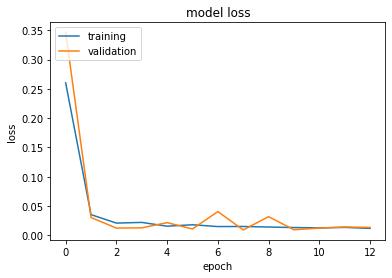

In [236]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [237]:
# performing predictions
predictions2 = model2.predict(X_test) 

# unscaling the predictions
predictions2 = scaler_y.inverse_transform(np.array(predictions2).reshape((len(predictions2), 1)))

# printing the predictions
print('Predictions:')
predictions2

Predictions:


array([[133.96611],
       [134.5668 ],
       [134.56721],
       [130.67635],
       [133.12161],
       [136.45882],
       [136.12146],
       [132.60095],
       [132.7678 ],
       [131.9292 ],
       [133.5654 ],
       [135.67354],
       [134.54816],
       [133.56221],
       [133.49873],
       [133.06499],
       [131.60277],
       [130.50005],
       [128.92078],
       [129.08679],
       [129.1753 ],
       [128.38675],
       [127.81561],
       [128.13696],
       [128.6871 ],
       [128.57413],
       [128.91968],
       [129.16647],
       [128.92825],
       [128.78606],
       [128.19022],
       [128.02191],
       [127.9404 ],
       [127.89854],
       [128.5754 ],
       [128.8619 ],
       [129.40045],
       [129.44658],
       [129.57428],
       [130.18951],
       [131.81374],
       [131.78099],
       [132.67094],
       [133.38794],
       [133.64737],
       [134.29158],
       [135.15266],
       [135.34726],
       [135.60617],
       [135.87856],


# Unscaling

In [238]:
# unscaling the test feature dataset, x_test
# unscaling the test y dataset, y_test+
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

# Comparision

###  Plotting

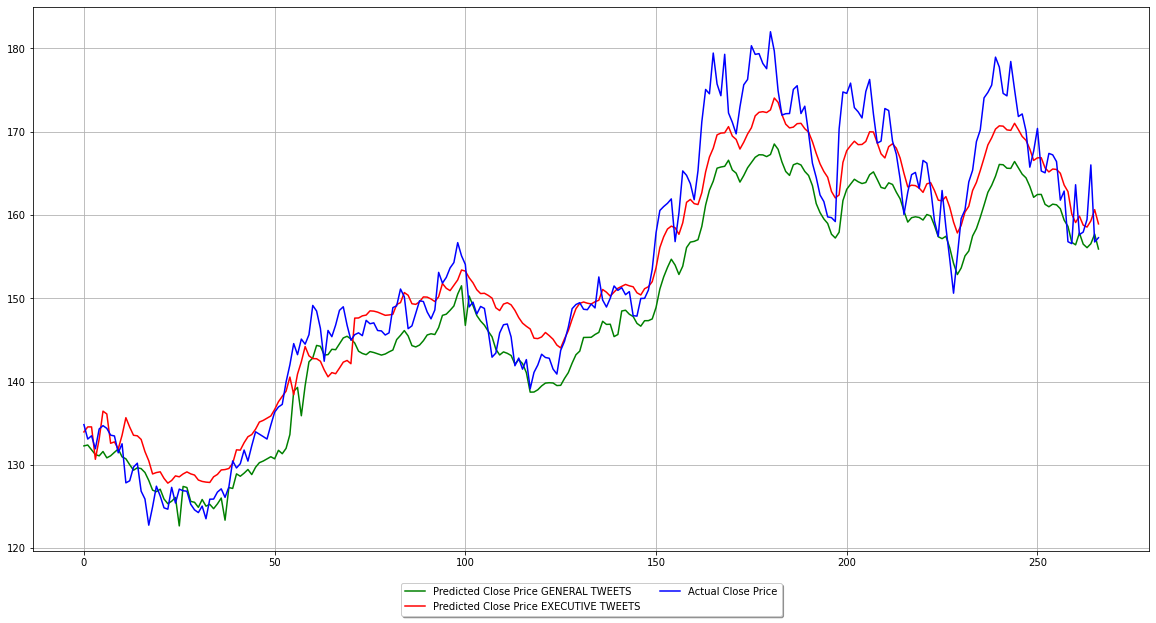

In [239]:

plt.figure(figsize=(20,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions1,'-g', label="Predicted Close Price GENERAL TWEETS")
plt.plot(predictions2,'-r', label="Predicted Close Price EXECUTIVE TWEETS")
plt.plot([row[0] for row in y_test],color = 'b', label="Actual Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.show()


### Mean Absolute Error

In [240]:
from sklearn.metrics import mean_absolute_error

print("MAE general",mean_absolute_error(y_test,predictions1))
print("MAE executive",mean_absolute_error(y_test,predictions2))

MAE general 4.7004341668404
MAE executive 3.0757459147592607


### MSE and RMSE SCORE

In [241]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE1 = np.square(np.subtract(y_test,predictions1)).mean() 
MSE2 = np.square(np.subtract(y_test,predictions2)).mean() 

print("MSE general",MSE1)
print("MSE executive",MSE2)

RMSE1 = MSE1
RMSE2 = MSE2

print('Root Mean Square Error General Tweets (sklearn.metrics) =', round(np.sqrt(RMSE1),4))
print('Root Mean Square Error Executive Tweets (sklearn.metrics) =', round(np.sqrt(RMSE2),4))

MSE general 35.08102501135852
MSE executive 14.90073552944899
Root Mean Square Error General Tweets (sklearn.metrics) = 5.9229
Root Mean Square Error Executive Tweets (sklearn.metrics) = 3.8601


### R2

In [242]:
from sklearn.metrics import r2_score
r2 =[ r2_score(y_test,predictions1), r2_score(y_test,predictions2)]
print('R2 general',r2[0])
print('R2 executive',r2[1])

R2 general 0.8594406517389432
R2 executive 0.9402971357321633


### MAPE

In [243]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    
print("MAPE General",MAPE(y_test,predictions1), "%")
print("MAPE Executive",MAPE(y_test,predictions2), "%")

MAPE General 2.9320519772528946 %
MAPE Executive 1.9900669210806066 %


### Conclusion
 General Tweets can affect the stock market better than Executive Tweets

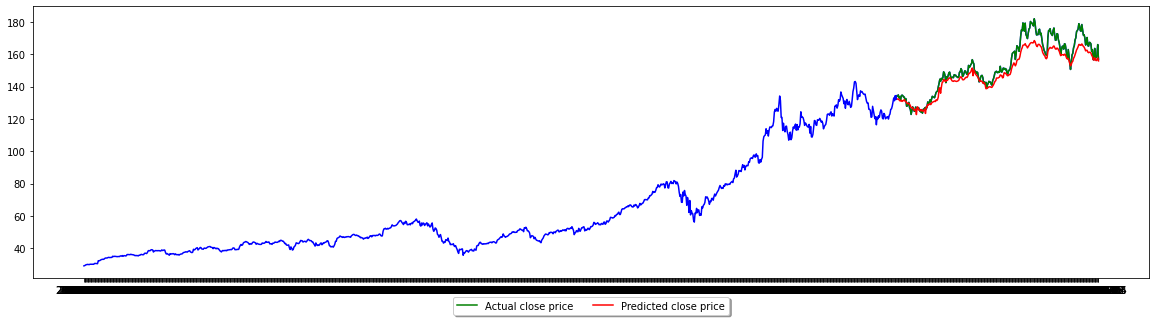

In [244]:
val = data[len(y_train)+1:]
val['pred'] = predictions1
plt.figure(figsize = (20,5))
plt.plot(data['close_price'], color = 'b')
plt.plot(val['close_price'], label = 'Actual close price', color = 'g')
plt.plot(val['pred'], label = 'Predicted close price', color = 'r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()